<a href="https://colab.research.google.com/github/phu0n9/BigData_movie/blob/master/statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# RMIT University in Vietnam
# Course: EEET2574 Big Data in Engineering
# Semester: 2020B
# Assessment: Big Data Project
# Authors: 
#   Tran Dam Quan           - s3678708
#   Nguyen Huynh Anh Phuong - s3695662
#   Le Nguyen Thien Phu     - s3639855
#   Tran Phi                - s3636649
# Date: 27/09/2020

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing library

In [ ]:
import pandas as pd 
import numpy as np
from scipy import stats
import datetime
from IPython.display import Image, HTML

import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Data

In [ ]:
final_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Group Assignment/movies.csv", delimiter=",")
genre_point_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Group Assignment/genre_point.csv", delimiter=",")
genre_point_df['Month'] = genre_point_df['Month'].replace(regex=[r' ',r'\[',r'\]'], value='')
genre_point_df['profit_by_month'] = genre_point_df['profit_by_month'].replace(regex=[r' ',r'\[',r'\]'], value='')
genre_point_df['revenue_by_month'] = genre_point_df['revenue_by_month'].replace(regex=[r' ',r'\[',r'\]'], value='')
cast_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Group Assignment/cast_data.csv", delimiter=",")

# Data statistic

In [ ]:
final_df.columns.values

array(['imdb_id', 'title', 'date_published', 'duration', 'budget',
       'revenue', 'year', 'popularity', 'overview', 'Month', 'Day',
       'day_of_week', 'month_name', 'profit', 'ROI', 'actor_movie_count',
       'actor_movie_pop', 'actress_movie_count', 'actress_movie_pop',
       'director_movie_count', 'director_movie_pop', 'writer_movie_count',
       'writer_movie_pop', 'crew_count', 'crew_pop', 'genre_list',
       'genre_count', 'Comedy', 'Crime', 'Horror', 'Biography', 'Drama',
       'Action', 'Adventure', 'Mystery', 'Fantasy', 'Animation',
       'Western', 'Family', 'Sci-Fi', 'Romance', 'Thriller', 'Musical',
       'War', 'Sport', 'Music', 'History', 'total_votes', 'mean_vote',
       'median_vote', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_18age_avg_vote', 'males_18a

### Overview vs title text

In [ ]:
title_corpus = ' '.join(final_df['title'])
overview_corpus = ' '.join(final_df['overview'])

(-0.5, 399.5, 199.5, -0.5)

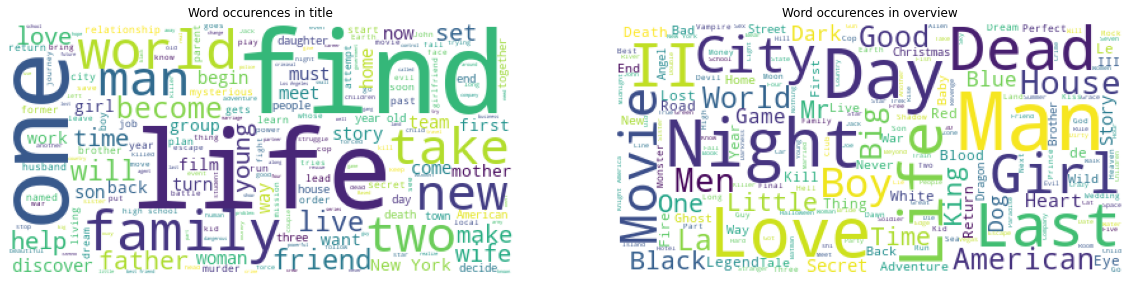

In [ ]:
# Create word cloud for titles and overviews
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(title_corpus)
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(overview_corpus)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].set_title('Word occurences in title')
axes[0].imshow(overview_wordcloud)
axes[0].axis('off')
axes[1].set_title('Word occurences in overview')
axes[1].imshow(title_wordcloud)
axes[1].axis('off')

### year vs movie count

In [ ]:
year_movie = final_df.groupby('year',as_index=False)['imdb_id'].count().rename(columns={'imdb_id':'count'})
year_movie.head()

year  count
0  1980     44
1  1981     53
2  1982     62
3  1983     72
4  1984     73

In [ ]:
fig = go.Figure(data=go.Scatter(x=year_movie['year'],y=year_movie['count'],mode='lines'))
fig.update_layout(title='Movies through 1980 to 2017',xaxis_title="Year",yaxis_title="Number of movies")
fig.show()

## Month 

### Month vs movie count

In [ ]:
idx = pd.date_range(start='1980-01', freq='M', periods=12)
month_movie = final_df.groupby('month_name',as_index=False)['imdb_id'].count().rename(columns={'imdb_id':'movie_count'})
month_movie.head()

month_name  movie_count
0      April          633
1     August          607
2   December          497
3   February          577
4    January          607

### Month vs Blockbuster

In [ ]:
month_blockbuster = final_df[final_df['revenue'] > 1e8].groupby('month_name',as_index=False)['revenue'].mean()
month_blockbuster.head()

month_name       revenue
0      April  3.024533e+08
1     August  2.396253e+08
2   December  3.290472e+08
3   February  2.175068e+08
4    January  2.330450e+08

[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December')]

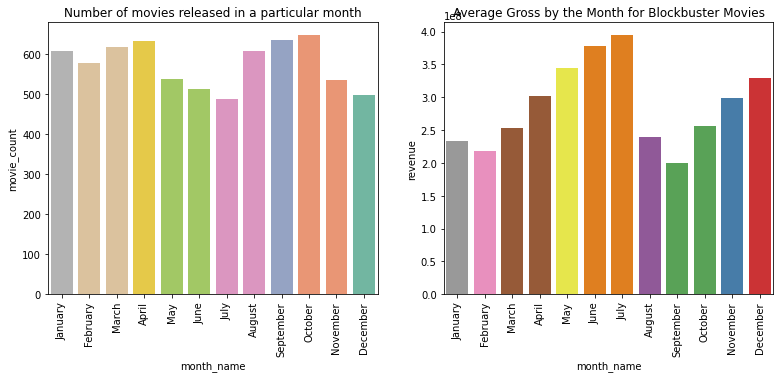

In [ ]:
# plt.figure(figsize=(12,6))
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
# fig.suptitle('Number of movies released in months')
axes[0].set_title('Number of movies released in a particular month')
ax = sns.barplot(x='month_name',y='movie_count',data=month_movie,order=idx.month_name(),palette='Set2_r',ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
axes[1].set_title('Average Gross by the Month for Blockbuster Movies')
ax = sns.barplot(x='month_name',y='revenue',data=month_blockbuster,order=idx.month_name(),palette='Set1_r',ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### month vs profit

(-100000000.0, 200000000.0)

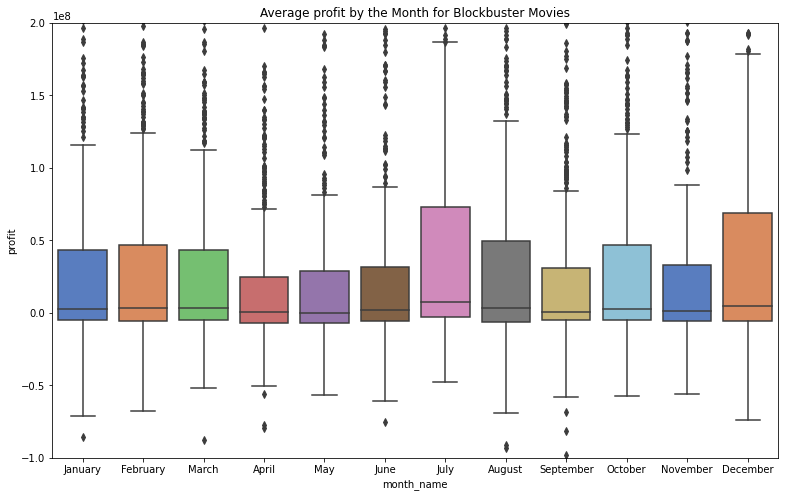

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(13, 8))
sns.boxplot(x='month_name',y='profit',data=final_df,order=idx.month_name(),ax=ax,palette="muted").set(title="Average profit by the Month for Blockbuster Movies")
ax.set_ylim([-0.1e9,0.2e9])

## Day 

### Day vs movie count dataframe

In [ ]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_movie = final_df.groupby('day_of_week',as_index=False)['imdb_id'].count().rename(columns={'imdb_id':'movie_count'})
day_movie.head()

day_of_week  movie_count
0      Friday         5429
1      Monday           82
2    Saturday          140
3      Sunday           57
4    Thursday          606

### Day vs movie count

<Figure size 864x432 with 0 Axes>

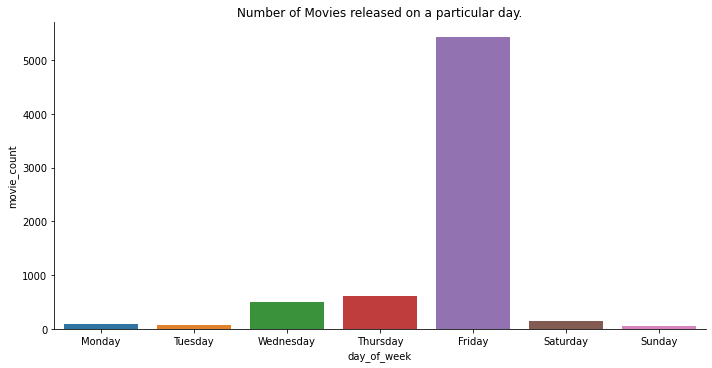

In [ ]:
plt.figure(figsize=(12,6))
sns.catplot(x='day_of_week',y='movie_count',data=day_movie,kind='bar',order=day,height=5,aspect=2).set(title="Number of Movies released on a particular day.")

## Duration

In [ ]:
final_df['duration'].describe().to_frame()

duration
count  6896.000000
mean    106.348318
std      17.935002
min      63.000000
25%      94.000000
50%     103.000000
75%     115.000000
max     271.000000

### Duration generalization

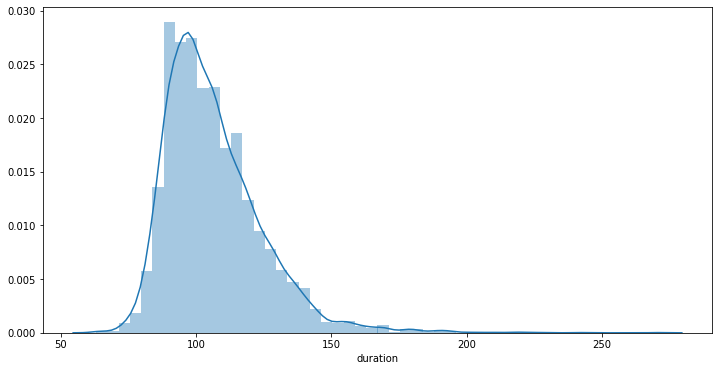

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(final_df[(final_df['duration'] < 300) & (final_df['duration'] > 0)]['duration'])

### Duration correlation with profit and budget

No handles with labels found to put in legend.
No handles with labels found to put in legend.


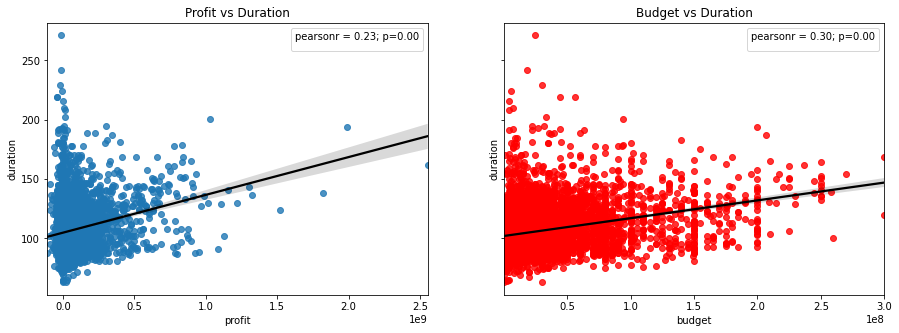

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(15, 5))
axes[0].set_title('Profit vs Duration')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['duration'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['duration'])[1])
sns.regplot(x='profit',y='duration',data=final_df,ax=axes[0], line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1].set_title('Budget vs Duration')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['budget'],final_df['duration'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['budget'],final_df['duration'])[1])
sns.regplot(x='budget',y='duration',data=final_df,ax=axes[1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

### Average duration during years

In [ ]:
year_duration = final_df.groupby('year',as_index=False)['duration'].mean()
year_duration.head()

year    duration
0  1980  113.227273
1  1981  106.528302
2  1982  107.919355
3  1983  105.194444
4  1984  109.054795

In [ ]:
fig = go.Figure(data=go.Scatter(x=year_duration['year'],y=year_duration['duration'],mode='lines'))
fig.update_layout(title='Movies through 1980 to 2017 with duration',xaxis_title="Year",yaxis_title="Number of movies")
fig.show()

## Budget

In [ ]:
final_df['budget'].describe().to_frame()

budget
count  6.896000e+03
mean   2.832755e+07
std    3.643665e+07
min    2.000000e+01
25%    6.000000e+06
50%    1.500000e+07
75%    3.500000e+07
max    3.000000e+08

### Budget generalization 

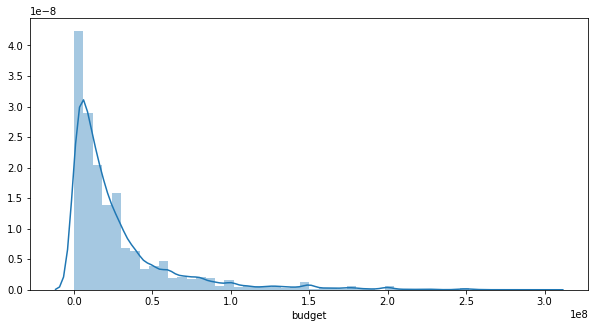

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
sns.distplot(final_df['budget'])

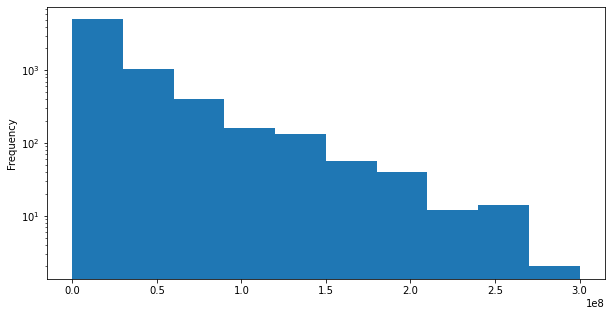

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
final_df['budget'].plot(logy=True, kind='hist')

### Movies with highest budget

In [ ]:
final_df[['title','year','budget','revenue','profit','ROI']].sort_values('budget',ascending=False).head(10).reset_index(drop=True)

title  year  ...      profit         ROI
0  Pirates of the Caribbean: At World's End  2007  ...   660996492  220.332164
1                            Justice League  2017  ...   357924295  119.308098
2                          Superman Returns  2006  ...   121081192   44.844886
3                                   Tangled  2011  ...   331794936  127.613437
4                              Spider-Man 3  2007  ...   632871626  245.299080
5                               John Carter  2012  ...    34139100   13.655640
6                   The Fate of the Furious  2017  ...   986005118  394.402047
7                   Avengers: Age of Ultron  2015  ...  1152805868  461.122347
8                     The Dark Knight Rises  2012  ...   831041287  332.416515
9    Harry Potter and the Half-Blood Prince  2009  ...   684326396  273.730558

[10 rows x 6 columns]

## Revenue

In [ ]:
final_df['revenue'].describe().to_frame()

revenue
count  6.896000e+03
mean   7.314949e+07
std    1.526668e+08
min    1.700000e+01
25%    2.690815e+06
50%    1.805711e+07
75%    7.146056e+07
max    2.789968e+09

### Revenue generalization

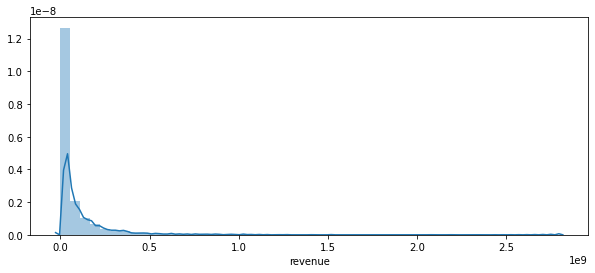

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 4)
sns.distplot(final_df['revenue'])

### Movies with highest revenue

In [ ]:
final_df[['title','year','budget','revenue','profit','ROI']].sort_values('revenue',ascending=False).head(10).reset_index(drop=True)

title  year  ...      profit          ROI
0                                        Avatar  2009  ...  2552968301  1077.201815
1                                       Titanic  1998  ...  1987463944   993.731972
2    Star Wars: Episode VII - The Force Awakens  2015  ...  1823223624   744.172908
3                                Jurassic World  2015  ...  1520400637  1013.600425
4                                  The Avengers  2012  ...  1298812988   590.369540
5                                 Furious Seven  2015  ...  1325047671   697.393511
6                       Avengers: Age of Ultron  2015  ...  1152805868   461.122347
7  Harry Potter and the Deathly Hallows: Part 2  2011  ...  1216932398   973.545918
8                                        Frozen  2013  ...  1124219009   749.479339
9                          Beauty and the Beast  2017  ...  1103521126   689.700704

[10 rows x 6 columns]

### Movies with highest revenue through years

In [ ]:
year_revenue = final_df.groupby('year',as_index=False)['revenue'].max()
year_revenue.head()

year    revenue
0  1980  547879454
1  1981  390133212
2  1982  792910554
3  1983  475347111
4  1984  333107271

In [ ]:
fig = go.Figure(data=go.Scatter(x=year_revenue['year'],y=year_revenue['revenue'],mode='lines'))
fig.update_layout(title='Movies with highest revenue through 1980 to 2017 ',xaxis_title="Year",yaxis_title="Number of movies")
fig.show()

## ROI


### Movies with highest ROI and budget more than 5 million dollars

In [ ]:
final_df[final_df['budget'] > 5e6][['title','year','budget','revenue','profit','ROI']].sort_values('ROI',ascending=False).head(10).reset_index(drop=True)

title  year  ...     profit          ROI
0                      E.T. the Extra-Terrestrial  1982  ...  782410554  7451.529086
1                              Look Who's Talking  1990  ...  289499813  3859.997507
2                                       Annabelle  2014  ...  250547661  3854.579400
3                                Crocodile Dundee  1986  ...  319403506  3629.585295
4                                   Dirty Dancing  1987  ...  211688008  3528.133467
5                                    Pretty Woman  1990  ...  449406268  3210.044771
6                                           Split  2017  ...  269454358  2993.937311
7                                            Juno  2008  ...  223911584  2985.487787
8  Star Wars: Episode V - The Empire Strikes Back  1980  ...  529879454  2943.774744
9                               The King's Speech  2011  ...  399242458  2661.616387

[10 rows x 6 columns]

### Movies with lowest ROI and budget more than 5 million dollars

In [ ]:
final_df[(final_df['budget'] > 5e6) & (final_df['revenue'] < 1e5)][['title','year','budget','revenue','profit','ROI']].sort_values('ROI',ascending=False).head(10).reset_index(drop=True)

title  year   budget  revenue   profit        ROI
0              Salvation Boulevard  2011  5500000    89182 -5410818 -98.378509
1                        The Badge  2002  6000000    97080 -5902920 -98.382000
2                       The Runner  2015  6000000    93296 -5906704 -98.445067
3                          7 Below  2012  6000000    85226 -5914774 -98.579567
4                           Eulogy  2004  6500000    89781 -6410219 -98.618754
5                   In Enemy Hands  2005  5400000    64236 -5335764 -98.810444
6                          Ringu 2  1999  6000000    65586 -5934414 -98.906900
7                      Harvard Man  2001  5500000    56653 -5443347 -98.969945
8        Careful What You Wish For  2015  8000000    82230 -7917770 -98.972125
9  How to Kill Your Neighbor's Dog  2003  7300000    73510 -7226490 -98.993014

## Budget vs Revenue

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



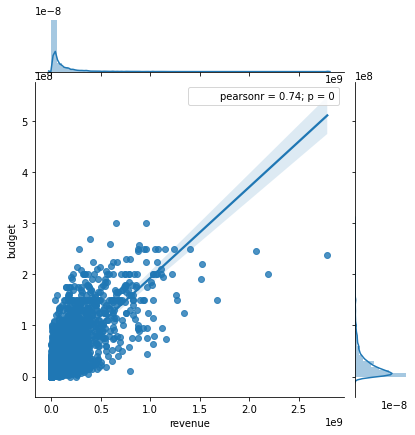

In [ ]:
sns.jointplot(x='revenue',y='budget',data=final_df,stat_func=stats.pearsonr, kind="reg")

In [ ]:
fig = px.scatter(final_df, x='revenue', y='budget',hover_data=['title','year'])
fig.update_layout(title='Revenue vs Budget',xaxis_title="revenue",yaxis_title="budget",autosize=False,width=500,height=300)
fig.show()

## Cast

### Actor

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


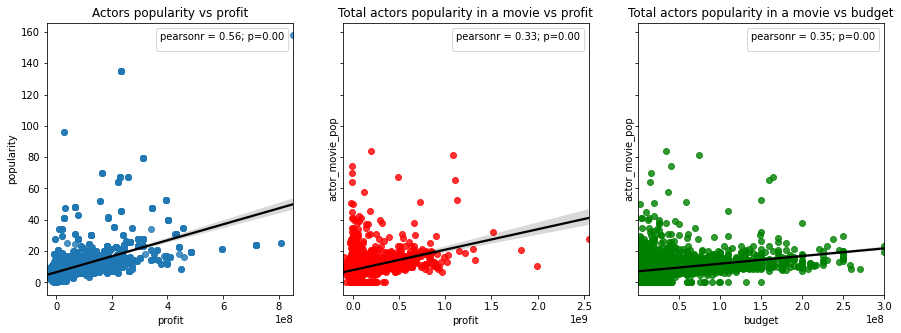

In [ ]:
fig, axes = plt.subplots(ncols=3, sharey=True,figsize=(15, 5))
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(cast_data[cast_data['category']=='actor']['profit'],cast_data[cast_data['category']=='actor']['popularity'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(cast_data[cast_data['category']=='actor']['profit'],cast_data[cast_data['category']=='actor']['popularity'])[1])
axes[0].set_title('Actors popularity vs profit')
sns.regplot(x='profit',y='popularity',data=cast_data[cast_data['category']=='actor'],ax=axes[0],line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1].set_title('Total actors popularity in a movie vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['actor_movie_pop'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['actor_movie_pop'])[1])
sns.regplot(x='profit',y='actor_movie_pop',data=final_df,ax=axes[1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[2].set_title('Total actors popularity in a movie vs budget')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['budget'],final_df['actor_movie_pop'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['budget'],final_df['actor_movie_pop'])[1])
sns.regplot(x='budget',y='actor_movie_pop',data=final_df,ax=axes[2],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

In [ ]:
fig = px.scatter(cast_data[cast_data['category']=='actor'], x='profit', y='popularity',hover_data=['primaryName'])
fig.update_layout(title='Profit vs Actor popularity',xaxis_title="profit",yaxis_title="popularity",autosize=False,width=500,height=300)
fig.show()

In [ ]:
fig = px.scatter(final_df, x='profit', y='actor_movie_pop',hover_data=['title','year'])
fig.update_layout(title='Profit vs actor popularity in movies',xaxis_title="profit",yaxis_title="Actor popularity",autosize=False,width=500,height=300)
fig.show()

### Actress

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


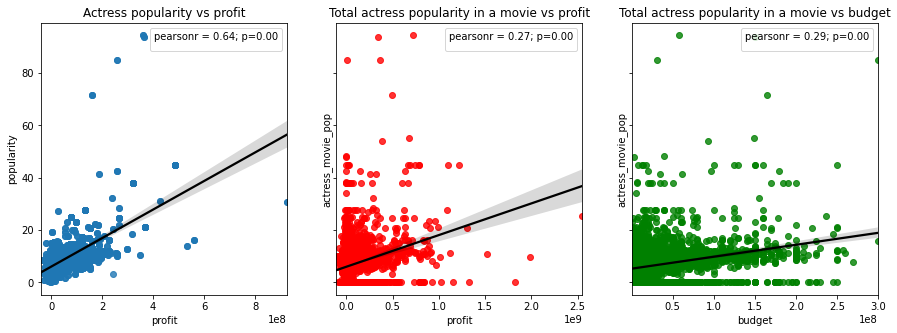

In [ ]:
fig, axes = plt.subplots(ncols=3, sharey=True,figsize=(15, 5))
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(cast_data[cast_data['category']=='actress']['profit'],cast_data[cast_data['category']=='actress']['popularity'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(cast_data[cast_data['category']=='actress']['profit'],cast_data[cast_data['category']=='actress']['popularity'])[1])
axes[0].set_title('Actress popularity vs profit')
sns.regplot(x='profit',y='popularity',data=cast_data[cast_data['category']=='actress'],ax=axes[0],line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1].set_title('Total actress popularity in a movie vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['actress_movie_pop'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['actress_movie_pop'])[1])
sns.regplot(x='profit',y='actress_movie_pop',data=final_df,ax=axes[1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[2].set_title('Total actress popularity in a movie vs budget')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['budget'],final_df['actress_movie_pop'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['budget'],final_df['actress_movie_pop'])[1])
sns.regplot(x='budget',y='actress_movie_pop',data=final_df,ax=axes[2],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

In [ ]:
fig = px.scatter(cast_data[cast_data['category']=='actress'], x='profit', y='popularity',hover_data=['primaryName'])
fig.update_layout(title='Profit vs Actress popularity',xaxis_title="profit",yaxis_title="popularity",autosize=False,width=500,height=300)
fig.show()

In [ ]:
fig = px.scatter(final_df, x='profit', y='actress_movie_pop',hover_data=['title','year'])
fig.update_layout(title='Profit vs actress popularity in movies',xaxis_title="profit",yaxis_title="Actress popularity",autosize=False,width=500,height=300)
fig.show()

### Director

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


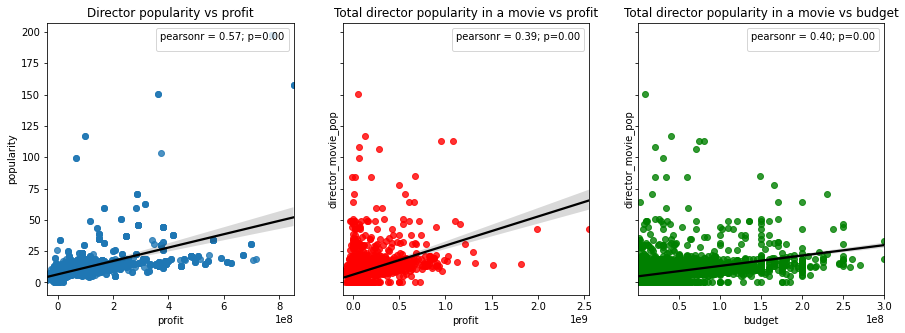

In [ ]:
fig, axes = plt.subplots(ncols=3, sharey=True,figsize=(15, 5))
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(cast_data[cast_data['category']=='director']['profit'],cast_data[cast_data['category']=='director']['popularity'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(cast_data[cast_data['category']=='director']['profit'],cast_data[cast_data['category']=='director']['popularity'])[1])
axes[0].set_title('Director popularity vs profit')
sns.regplot(x='profit',y='popularity',data=cast_data[cast_data['category']=='director'],ax=axes[0],line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1].set_title('Total director popularity in a movie vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['director_movie_pop'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['director_movie_pop'])[1])
sns.regplot(x='profit',y='director_movie_pop',data=final_df,ax=axes[1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[2].set_title('Total director popularity in a movie vs budget')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['budget'],final_df['director_movie_pop'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['budget'],final_df['director_movie_pop'])[1])
sns.regplot(x='budget',y='director_movie_pop',data=final_df,ax=axes[2],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

In [ ]:
fig = px.scatter(cast_data[cast_data['category']=='director'], x='profit', y='popularity',hover_data=['primaryName'])
fig.update_layout(title='Profit vs director popularity',xaxis_title="profit",yaxis_title="popularity",autosize=False,width=500,height=300)
fig.show()

In [ ]:
fig = px.scatter(final_df, x='profit', y='director_movie_pop',hover_data=['title','year'])
fig.update_layout(title='Profit vs director popularity in movies',xaxis_title="profit",yaxis_title="Director popularity",autosize=False,width=500,height=300)
fig.show()

### Writer 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


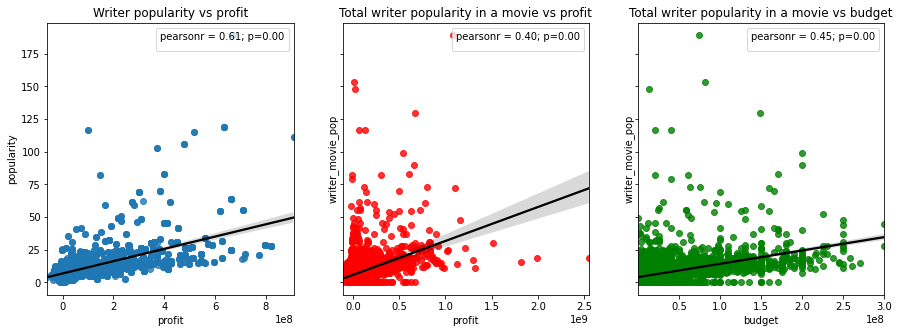

In [ ]:
fig, axes = plt.subplots(ncols=3, sharey=True,figsize=(15, 5))
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(cast_data[cast_data['category']=='writer']['profit'],cast_data[cast_data['category']=='writer']['popularity'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(cast_data[cast_data['category']=='writer']['profit'],cast_data[cast_data['category']=='writer']['popularity'])[1])
axes[0].set_title('Writer popularity vs profit')
sns.regplot(x='profit',y='popularity',data=cast_data[cast_data['category']=='writer'],ax=axes[0],line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1].set_title('Total writer popularity in a movie vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['writer_movie_pop'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['writer_movie_pop'])[1])
sns.regplot(x='profit',y='writer_movie_pop',data=final_df,ax=axes[1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[2].set_title('Total writer popularity in a movie vs budget')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['budget'],final_df['writer_movie_pop'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['budget'],final_df['writer_movie_pop'])[1])
sns.regplot(x='budget',y='writer_movie_pop',data=final_df,ax=axes[2],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

In [ ]:
fig = px.scatter(cast_data[cast_data['category']=='writer'], x='profit', y='popularity',hover_data=['primaryName'])
fig.update_layout(title='Profit vs writer popularity',xaxis_title="profit",yaxis_title="popularity",autosize=False,width=500,height=300)
fig.show()

In [ ]:
fig = px.scatter(final_df, x='profit', y='writer_movie_pop',hover_data=['title','year'])
fig.update_layout(title='Profit vs writer popularity in movies',xaxis_title="profit",yaxis_title="Writer popularity",autosize=False,width=500,height=300)
fig.show()

## Gender role

### Number of actor/actress appearances in movie correlation with profit 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


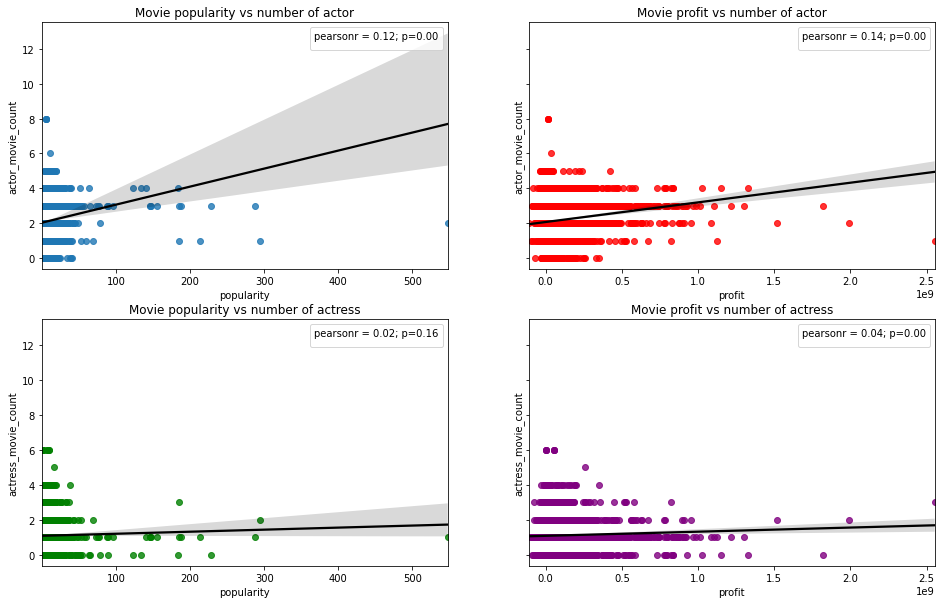

In [ ]:
fig, axes = plt.subplots(nrows= 2,ncols=2, sharey=True,figsize=(16, 10))
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['popularity'],final_df['actor_movie_count'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['popularity'],final_df['actor_movie_count'])[1])
axes[0,0].set_title('Movie popularity vs number of actor')
sns.regplot(x='popularity',y='actor_movie_count',data=final_df,ax=axes[0,0],line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[0,1].set_title('Movie profit vs number of actor')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['actor_movie_count'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['actor_movie_count'])[1])
sns.regplot(x='profit',y='actor_movie_count',data=final_df,ax=axes[0,1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1,0].set_title('Movie popularity vs number of actress')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['popularity'],final_df['actress_movie_count'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['popularity'],final_df['actress_movie_count'])[1])
sns.regplot(x='popularity',y='actress_movie_count',data=final_df,ax=axes[1,0],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1,1].set_title('Movie profit vs number of actress')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['actress_movie_count'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['profit'],final_df['actress_movie_count'])[1])
sns.regplot(x='profit',y='actress_movie_count',data=final_df,ax=axes[1,1],scatter_kws={"color": "purple"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

In [ ]:
year_actress_actor = final_df.groupby('year').apply(max).loc[:, ('actor_movie_count','actress_movie_count')]
year_actress_actor['year'] = year_actress_actor.index
year_actress_actor.head()

actor_movie_count  actress_movie_count  year
year                                              
1980                4.0                  2.0  1980
1981                4.0                  3.0  1981
1982                4.0                  2.0  1982
1983                4.0                  3.0  1983
1984                5.0                  2.0  1984

### Gender role in movies in 1980 to 2017

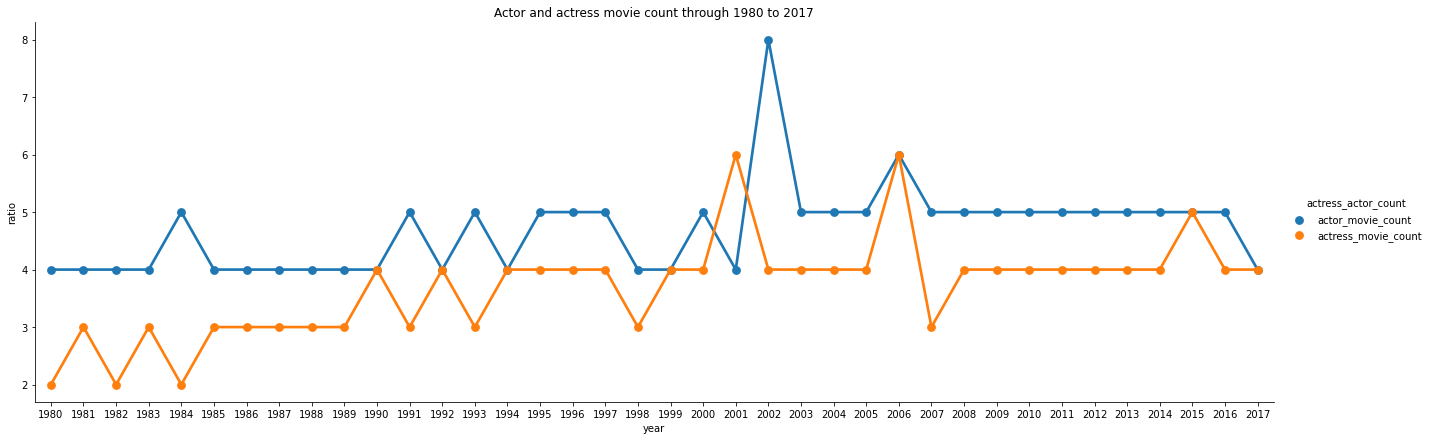

In [ ]:
year_actress_actor = year_actress_actor.melt('year', var_name='actress_actor_count', value_name='ratio')
sns.catplot(x='year', y="ratio", hue='actress_actor_count', data=year_actress_actor,height=6, aspect=3,kind='point').set(title="Actor and actress movie count through 1980 to 2017")

## Popularity

In [ ]:
final_df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10).reset_index(drop=True)

title  popularity  year
0                         Minions  547.488298  2015
1                    Wonder Woman  294.337037  2017
2            Beauty and the Beast  287.253654  2017
3                     Baby Driver  228.032744  2017
4                      Big Hero 6  213.849907  2015
5                        Deadpool  187.860492  2016
6  Guardians of the Galaxy Vol. 2  185.330992  2017
7                          Avatar  185.070892  2009
8                       John Wick  183.870374  2015
9                       Gone Girl  154.801009  2014

### Popularity generalization

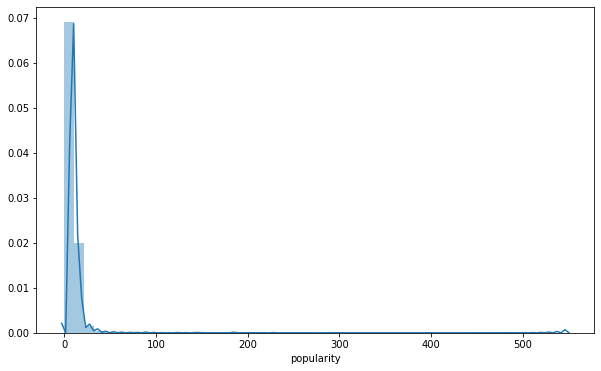

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.distplot(final_df['popularity'])

### Popularity correlation with profit

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



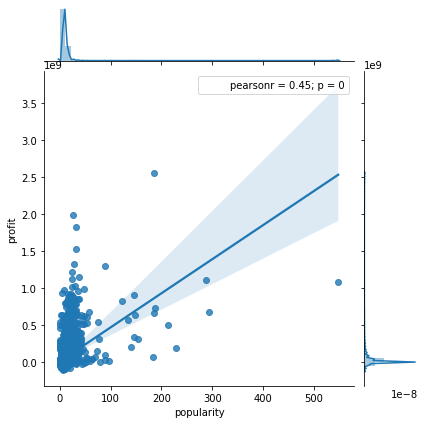

In [ ]:
sns.jointplot(x='popularity',y='profit',data=final_df,stat_func=stats.pearsonr, kind="reg")

## Votes

### Votes generalization

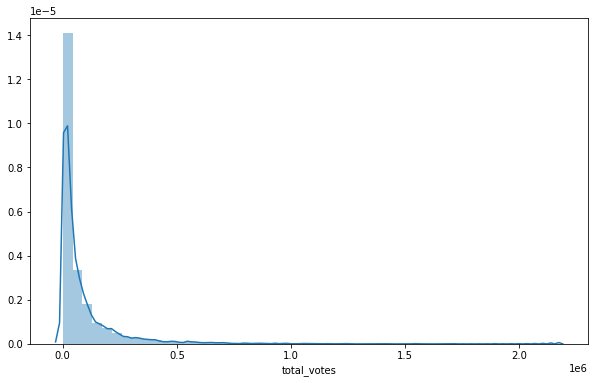

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.distplot(final_df['total_votes'])

In [ ]:
final_df[['title', 'total_votes', 'year']].sort_values('total_votes', ascending=False).head(10).reset_index(drop=True)

title  total_votes  year
0                           The Shawshank Redemption      2159628  1995
1                                    The Dark Knight      2134569  2008
2                                          Inception      1892929  2010
3                                         Fight Club      1725365  1999
4                                       Pulp Fiction      1695085  1994
5                                       Forrest Gump      1662528  1994
6                                         The Matrix      1554261  1999
7  The Lord of the Rings: The Fellowship of the Ring      1548863  2001
8      The Lord of the Rings: The Return of the King      1533574  2003
9                              The Dark Knight Rises      1421494  2012

In [ ]:
final_df['mean_vote'].describe().to_frame()

mean_vote
count  6896.000000
mean      6.432251
std       0.961147
min       1.300000
25%       5.900000
50%       6.500000
75%       7.100000
max       9.100000

In [ ]:
final_df['median_vote'].describe().to_frame()

median_vote
count  6896.000000
mean      6.473028
std       1.123581
min       1.000000
25%       6.000000
50%       7.000000
75%       7.000000
max      10.000000

### Mean vote generalization

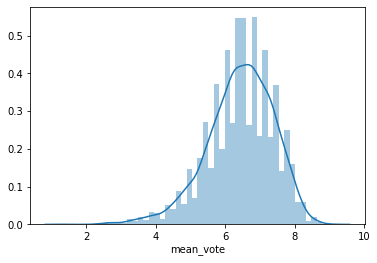

In [ ]:
sns.distplot(final_df['mean_vote'].fillna(final_df['mean_vote'].median()))

In [ ]:
final_df[final_df['total_votes'] > 2000][['title', 'mean_vote' ,'year']].sort_values('mean_vote', ascending=False).head(10).reset_index(drop=True)

title  mean_vote  year
0                           The Shawshank Redemption        9.1  1995
1                                    The Dark Knight        8.9  2008
2      The Lord of the Rings: The Return of the King        8.8  2003
3  The Lord of the Rings: The Fellowship of the Ring        8.7  2001
4                                       Forrest Gump        8.7  1994
5                                          Inception        8.7  2010
6                                   Schindler's List        8.7  1994
7                                       Pulp Fiction        8.7  1994
8                                         Fight Club        8.7  1999
9                                       Interstellar        8.6  2014

### Mean votes and Total votes vs profit correlation

No handles with labels found to put in legend.
No handles with labels found to put in legend.


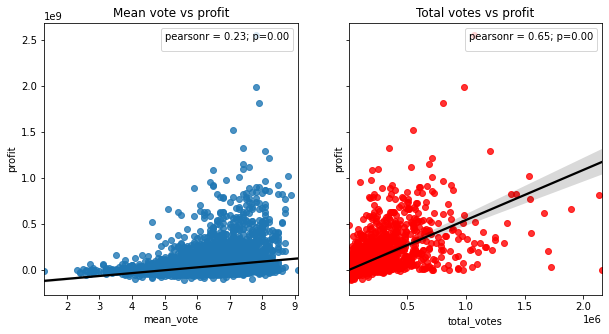

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(10, 5))
axes[0].set_title('Mean vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['mean_vote'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['mean_vote'],final_df['profit'])[1])
sns.regplot(x='mean_vote',y='profit',data=final_df,ax=axes[0], line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1].set_title('Total votes vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['total_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['total_votes'],final_df['profit'])[1])
sns.regplot(x='total_votes',y='profit',data=final_df,ax=axes[1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

### Votes in age range and genders

#### Total votes in all age and all genders vs profit

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


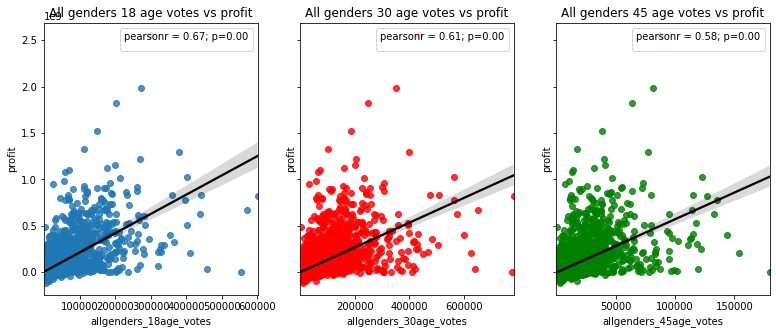

In [ ]:
fig, axes = plt.subplots(ncols=3, sharey=True,figsize=(13, 5))
axes[0].set_title('All genders 18 age votes vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['allgenders_18age_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['allgenders_18age_votes'],final_df['profit'])[1])
sns.regplot(x='allgenders_18age_votes',y='profit',data=final_df,ax=axes[0], line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1].set_title('All genders 30 age votes vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['allgenders_30age_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['allgenders_30age_votes'],final_df['profit'])[1])
sns.regplot(x='allgenders_30age_votes',y='profit',data=final_df,ax=axes[1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[2].set_title('All genders 45 age votes vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['allgenders_45age_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['allgenders_45age_votes'],final_df['profit'])[1])
sns.regplot(x='allgenders_45age_votes',y='profit',data=final_df,ax=axes[2],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

#### Average votes in all age and all genders vs profit

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


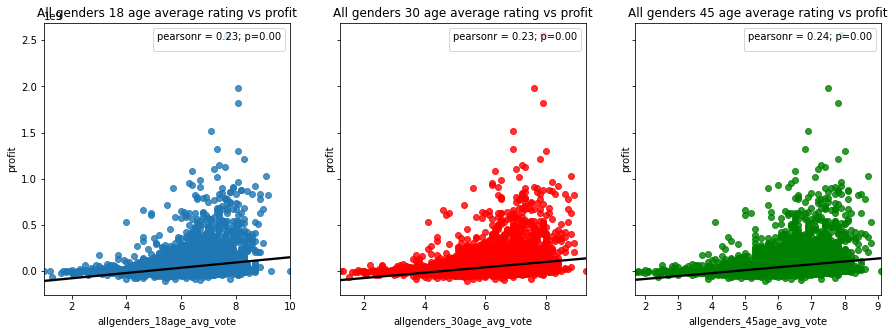

In [ ]:
fig, axes = plt.subplots(ncols=3, sharey=True,figsize=(15, 5))
axes[0].set_title('All genders 18 age average rating vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['allgenders_18age_avg_vote'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['allgenders_18age_avg_vote'],final_df['profit'])[1])
sns.regplot(x='allgenders_18age_avg_vote',y='profit',data=final_df,ax=axes[0], line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1].set_title('All genders 30 age average rating vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['allgenders_30age_avg_vote'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['allgenders_30age_avg_vote'],final_df['profit'])[1])
sns.regplot(x='allgenders_30age_avg_vote',y='profit',data=final_df,ax=axes[1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[2].set_title('All genders 45 age average rating vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['allgenders_45age_avg_vote'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['allgenders_45age_avg_vote'],final_df['profit'])[1])
sns.regplot(x='allgenders_45age_avg_vote',y='profit',data=final_df,ax=axes[2],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

#### All gender vs profit

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


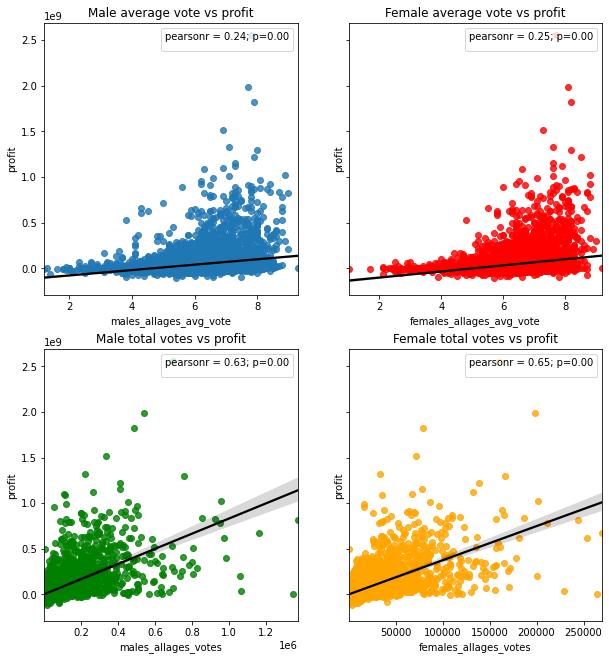

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2, sharey=True,figsize=(10, 11))
axes[0,0].set_title('Male average vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['males_allages_avg_vote'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['males_allages_avg_vote'],final_df['profit'])[1])
sns.regplot(x='males_allages_avg_vote',y='profit',data=final_df,ax=axes[0,0], line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[0,1].set_title('Female average vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['females_allages_avg_vote'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['females_allages_avg_vote'],final_df['profit'])[1])
sns.regplot(x='females_allages_avg_vote',y='profit',data=final_df,ax=axes[0,1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1,0].set_title('Male total votes vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['males_allages_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['males_allages_votes'],final_df['profit'])[1])
sns.regplot(x='males_allages_votes',y='profit',data=final_df,ax=axes[1,0],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1,1].set_title('Female total votes vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['females_allages_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['females_allages_votes'],final_df['profit'])[1])
sns.regplot(x='females_allages_votes',y='profit',data=final_df,ax=axes[1,1],scatter_kws={"color": "orange"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

#### Male votes vs profit

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


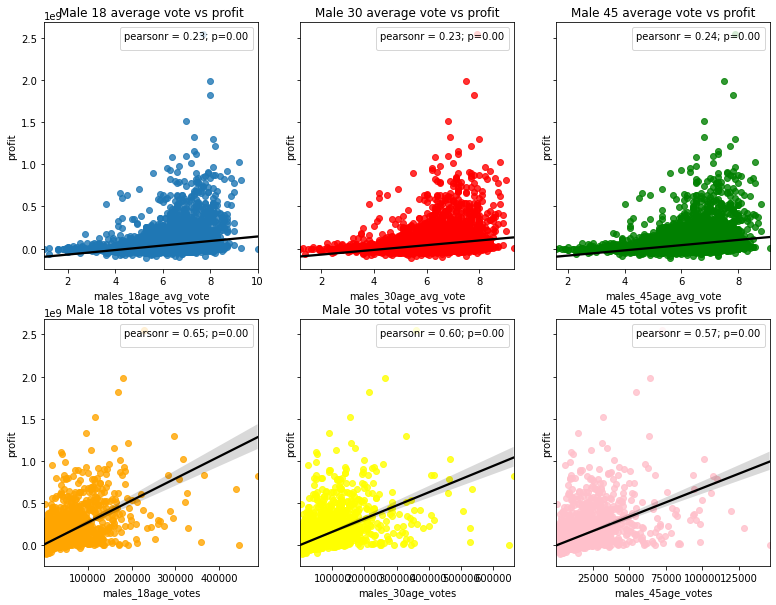

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=3, sharey=True,figsize=(13, 10))
axes[0,0].set_title('Male 18 average vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['males_18age_avg_vote'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['males_18age_avg_vote'],final_df['profit'])[1])
sns.regplot(x='males_18age_avg_vote',y='profit',data=final_df,ax=axes[0,0], line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[0,1].set_title('Male 30 average vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['males_30age_avg_vote'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['males_30age_avg_vote'],final_df['profit'])[1])
sns.regplot(x='males_30age_avg_vote',y='profit',data=final_df,ax=axes[0,1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[0,2].set_title('Male 45 average vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['males_45age_avg_vote'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['males_45age_avg_vote'],final_df['profit'])[1])
sns.regplot(x='males_45age_avg_vote',y='profit',data=final_df,ax=axes[0,2],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1,0].set_title('Male 18 total votes vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['males_18age_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['males_18age_votes'],final_df['profit'])[1])
sns.regplot(x='males_18age_votes',y='profit',data=final_df,ax=axes[1,0],scatter_kws={"color": "orange"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1,1].set_title('Male 30 total votes vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['males_30age_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['males_30age_votes'],final_df['profit'])[1])
sns.regplot(x='males_30age_votes',y='profit',data=final_df,ax=axes[1,1],scatter_kws={"color": "yellow"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1,2].set_title('Male 45 total votes vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['males_45age_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['males_45age_votes'],final_df['profit'])[1])
sns.regplot(x='males_45age_votes',y='profit',data=final_df,ax=axes[1,2],scatter_kws={"color": "pink"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

#### Female votes vs profit

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


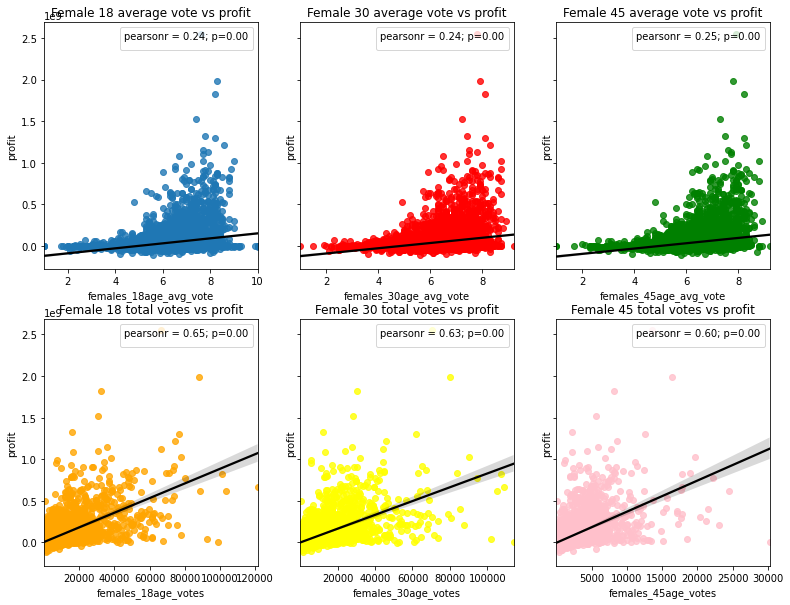

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=3, sharey=True,figsize=(13, 10))
axes[0,0].set_title('Female 18 average vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['females_18age_avg_vote'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['females_18age_avg_vote'],final_df['profit'])[1])
sns.regplot(x='females_18age_avg_vote',y='profit',data=final_df,ax=axes[0,0], line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[0,1].set_title('Female 30 average vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['females_30age_avg_vote'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['females_30age_avg_vote'],final_df['profit'])[1])
sns.regplot(x='females_30age_avg_vote',y='profit',data=final_df,ax=axes[0,1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[0,2].set_title('Female 45 average vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['females_45age_avg_vote'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['females_45age_avg_vote'],final_df['profit'])[1])
sns.regplot(x='females_45age_avg_vote',y='profit',data=final_df,ax=axes[0,2],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1,0].set_title('Female 18 total votes vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['females_18age_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['females_18age_votes'],final_df['profit'])[1])
sns.regplot(x='females_18age_votes',y='profit',data=final_df,ax=axes[1,0],scatter_kws={"color": "orange"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1,1].set_title('Female 30 total votes vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['females_30age_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['females_30age_votes'],final_df['profit'])[1])
sns.regplot(x='females_30age_votes',y='profit',data=final_df,ax=axes[1,1],scatter_kws={"color": "yellow"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1,2].set_title('Female 45 total votes vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['females_45age_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['females_45age_votes'],final_df['profit'])[1])
sns.regplot(x='females_45age_votes',y='profit',data=final_df,ax=axes[1,2],scatter_kws={"color": "pink"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

#### Us and non-us votes vs profit

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


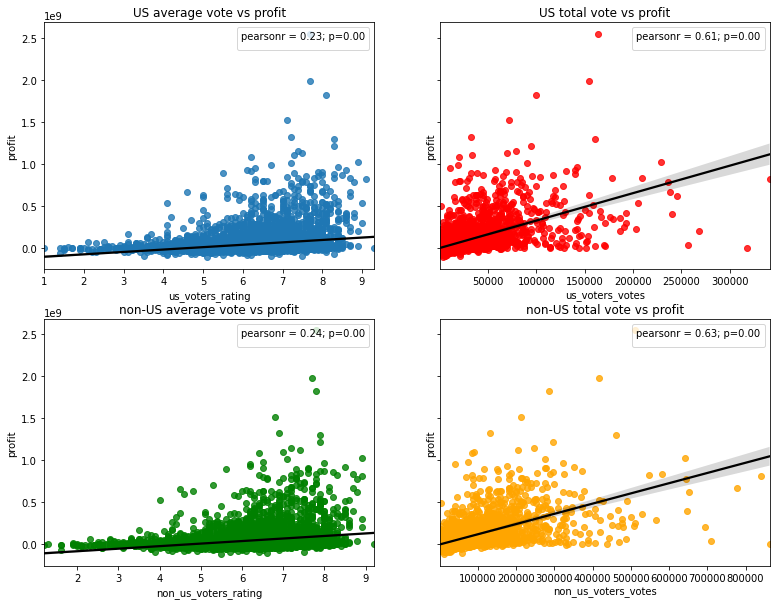

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2, sharey=True,figsize=(13, 10))
axes[0,0].set_title('US average vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['us_voters_rating'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['us_voters_rating'],final_df['profit'])[1])
sns.regplot(x='us_voters_rating',y='profit',data=final_df,ax=axes[0,0], line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[0,1].set_title('US total vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['us_voters_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['us_voters_votes'],final_df['profit'])[1])
sns.regplot(x='us_voters_votes',y='profit',data=final_df,ax=axes[0,1],scatter_kws={"color": "red"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1,0].set_title('non-US average vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['non_us_voters_rating'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['non_us_voters_rating'],final_df['profit'])[1])
sns.regplot(x='non_us_voters_rating',y='profit',data=final_df,ax=axes[1,0],scatter_kws={"color": "green"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")
axes[1,1].set_title('non-US total vote vs profit')
new_title = 'pearsonr = '+ "{:.2f}".format(stats.pearsonr(final_df['non_us_voters_votes'],final_df['profit'])[0])+'; p='+"{:.2f}".format(stats.pearsonr(final_df['non_us_voters_votes'],final_df['profit'])[1])
sns.regplot(x='non_us_voters_votes',y='profit',data=final_df,ax=axes[1,1],scatter_kws={"color": "orange"}, line_kws={"color": "black"}).legend(title = new_title,loc="upper right")

### Heatmap for votes

In [ ]:
final_df.columns

Index(['imdb_id', 'title', 'date_published', 'duration', 'budget', 'revenue',
       'year', 'popularity', 'overview', 'Month', 'Day', 'day_of_week',
       'month_name', 'profit', 'ROI', 'actor_movie_count', 'actor_movie_pop',
       'actress_movie_count', 'actress_movie_pop', 'director_movie_count',
       'director_movie_pop', 'writer_movie_count', 'writer_movie_pop',
       'crew_count', 'crew_pop', 'genre_list', 'genre_count', 'Comedy',
       'Crime', 'Horror', 'Biography', 'Drama', 'Action', 'Adventure',
       'Mystery', 'Fantasy', 'Animation', 'Western', 'Family', 'Sci-Fi',
       'Romance', 'Thriller', 'Musical', 'War', 'Sport', 'Music', 'History',
       'total_votes', 'mean_vote', 'median_vote', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_18age_avg_vote', 'males_18age_vote

In [ ]:
df = final_df.loc[:,('total_votes','allgenders_18age_votes','allgenders_30age_votes','allgenders_45age_votes',
                     'males_allages_votes','males_18age_votes','males_30age_votes','males_45age_votes',
                     'females_allages_votes','females_18age_votes','females_30age_votes','females_45age_votes','us_voters_votes',
                     'non_us_voters_votes','profit','budget')]

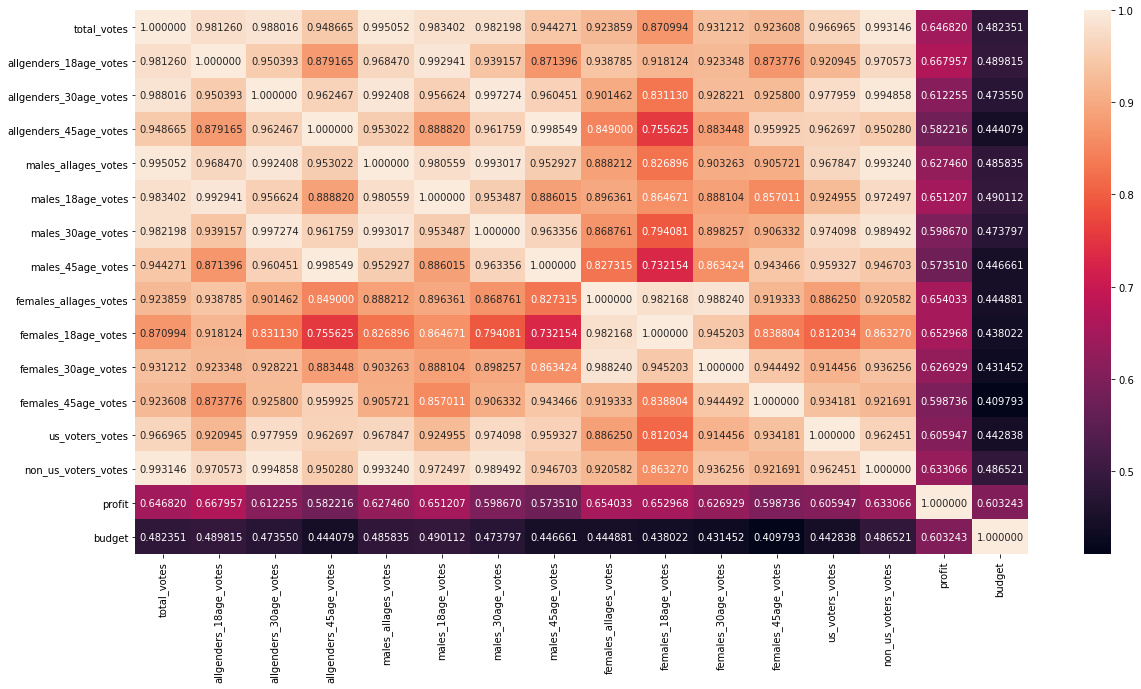

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True, fmt="f")

In [ ]:
new_df = final_df.loc[:,('total_votes','allgenders_18age_votes','allgenders_30age_votes','allgenders_45age_votes','males_allages_votes','males_18age_votes','males_30age_votes','males_45age_votes','females_allages_votes','females_18age_votes','females_30age_votes','females_45age_votes','us_voters_votes','non_us_voters_votes','revenue','budget')]

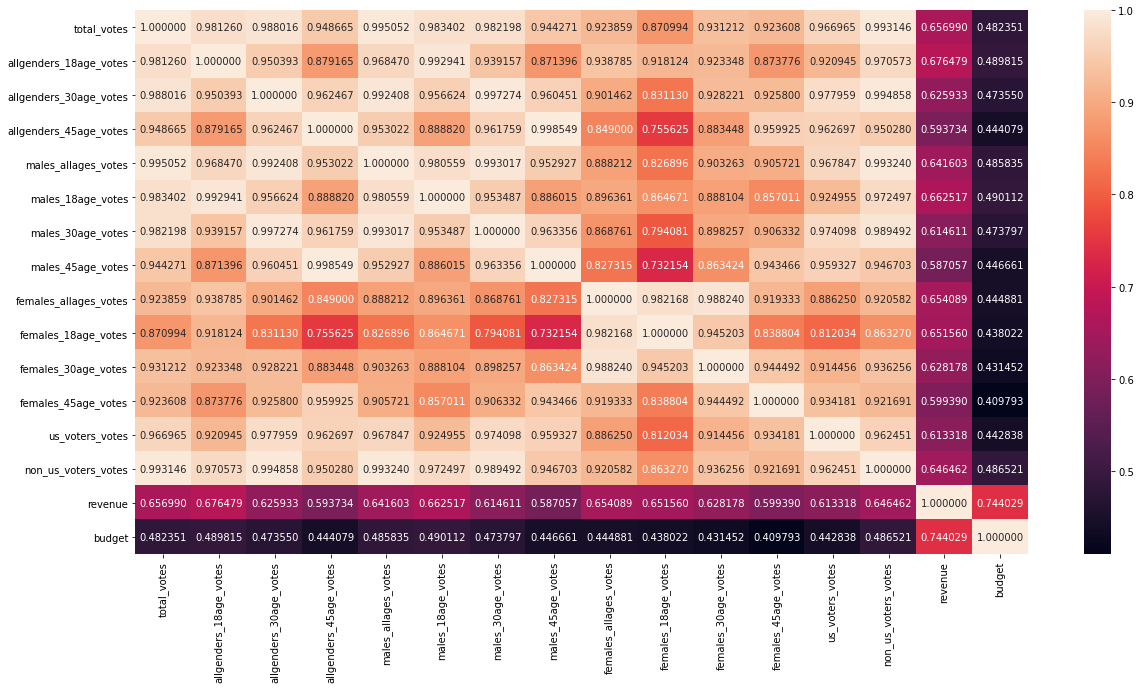

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(new_df.corr(),annot=True, fmt="f")

## Genre

In [ ]:
genre_point_df

genre  ...                                    profit_by_month
0      Comedy  ...  34281623.11827957,43877821.05217391,31474641.7...
1       Crime  ...  20930390.88590604,27937552.18446602,18382771.1...
2      Horror  ...  20303293.263888888,31947174.26785714,22096500....
3   Biography  ...  67607596.20967741,20375808.127659574,20206786....
4       Drama  ...  40538045.6119403,23739853.069908816,29855757.4...
5      Action  ...  40981102.35664336,40364277.225225225,63441715....
6   Adventure  ...  73345129.48333333,75888241.06666666,102292351....
7     Mystery  ...  15403923.149253732,29430142.672413792,30075904...
8     Fantasy  ...  18967100.707317073,42184868.06818182,90232795....
9   Animation  ...  154705143.7777778,125735428.74074075,153303610...
10    Western  ...  77989899.5,33285907.714285713,202628770.5,-112...
11     Family  ...  89915363.25,46742962.625,119863663.375,7213767...
12     Sci-Fi  ...  21021208.78125,34251145.23529412,88644208.9722...
13    Romance  ...  47561263.72164948,33076095.11304348,36616315.4...
14   Thriller  ...  26662420.51785714,39357562.34313726,20638128.1...
15    Musical  ...  119565742.66666667,15384155.75,363005681.33333...
16        War  ...  44259213.9,9756334.0,24728153.333333332,952608...
17      Sport  ...  44041599.61111111,21717478.0,26204859.5,203254...
18      Music  ...  40262666.95454545,36078456.368421055,28734312....
19    History  ...  68680631.65625,15064571.606060605,19622700.105...

[20 rows x 53 columns]

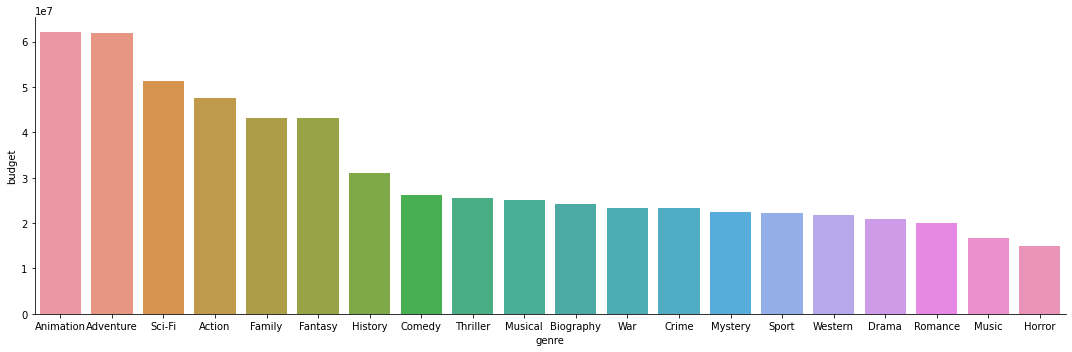

In [ ]:
# Budget by genres
sns.catplot(kind='bar',x='genre', y='budget', data=genre_point_df.sort_values('budget', ascending=False), height=5, aspect=3)

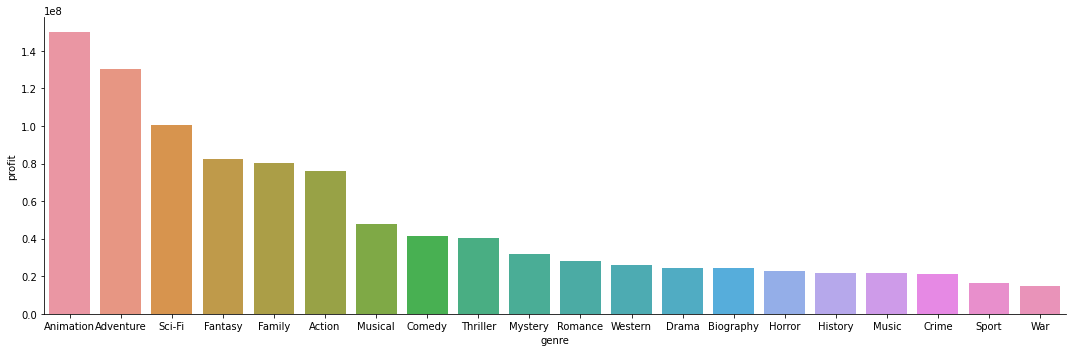

In [ ]:
# Profit by gernes
sns.catplot(kind='bar',x='genre', y='profit', data=genre_point_df.sort_values('profit', ascending=False), height=5, aspect=3)

Text(0.5, 1.0, 'Genre Popularity')

<Figure size 432x288 with 0 Axes>

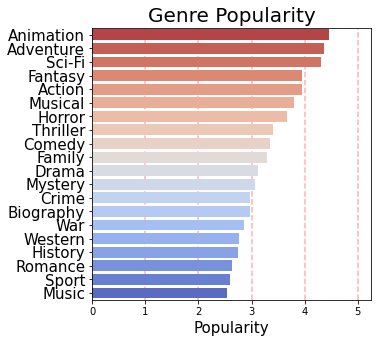

In [ ]:
# Genre popularity
plt.clf()
plt.figure(figsize=(5,5))
f = sns.barplot(x='point', y='genre',data=genre_point_df.sort_values('point', ascending=False), palette="coolwarm_r",zorder=2)
for x in f.get_xticks():
        f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)
f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
f.set_ylabel(None)
f.set_xlabel('Popularity',fontsize=15)
f.set_title('Genre Popularity', fontsize=20)

Genre vs Budget

Text(0.5, 1.0, 'Genre Budget')

<Figure size 432x288 with 0 Axes>

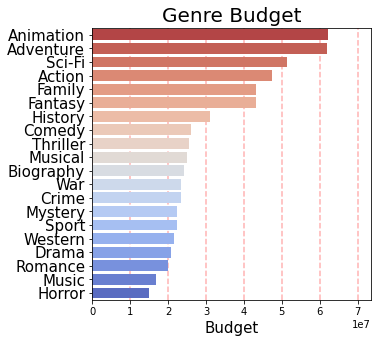

In [ ]:
# Genre budget
plt.clf()
plt.figure(figsize=(5,5))
f = sns.barplot(x='budget', y='genre',data=genre_point_df.sort_values('budget', ascending=False), palette="coolwarm_r",zorder=2)
for x in f.get_xticks():
        f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)
f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
f.set_ylabel(None)
f.set_xlabel('Budget',fontsize=15)
f.set_title('Genre Budget', fontsize=20)

## Genre vs Month

In [ ]:
# Mapping month (1-12) to Jan-Dec
genre_month = genre_point_df[['genre','Month']].copy().sort_values('Month')
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
         'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_count = genre_month[['genre','Month']]['Month'].str.split(',', expand=True)
month_count = month_count.astype('int64')
genre_month.drop('Month', axis=1, inplace=True)
genre_month[month] = month_count
genre_month.reset_index(drop=True, inplace=True)
genre_month.sort_index(inplace=True)

<Figure size 432x288 with 0 Axes>

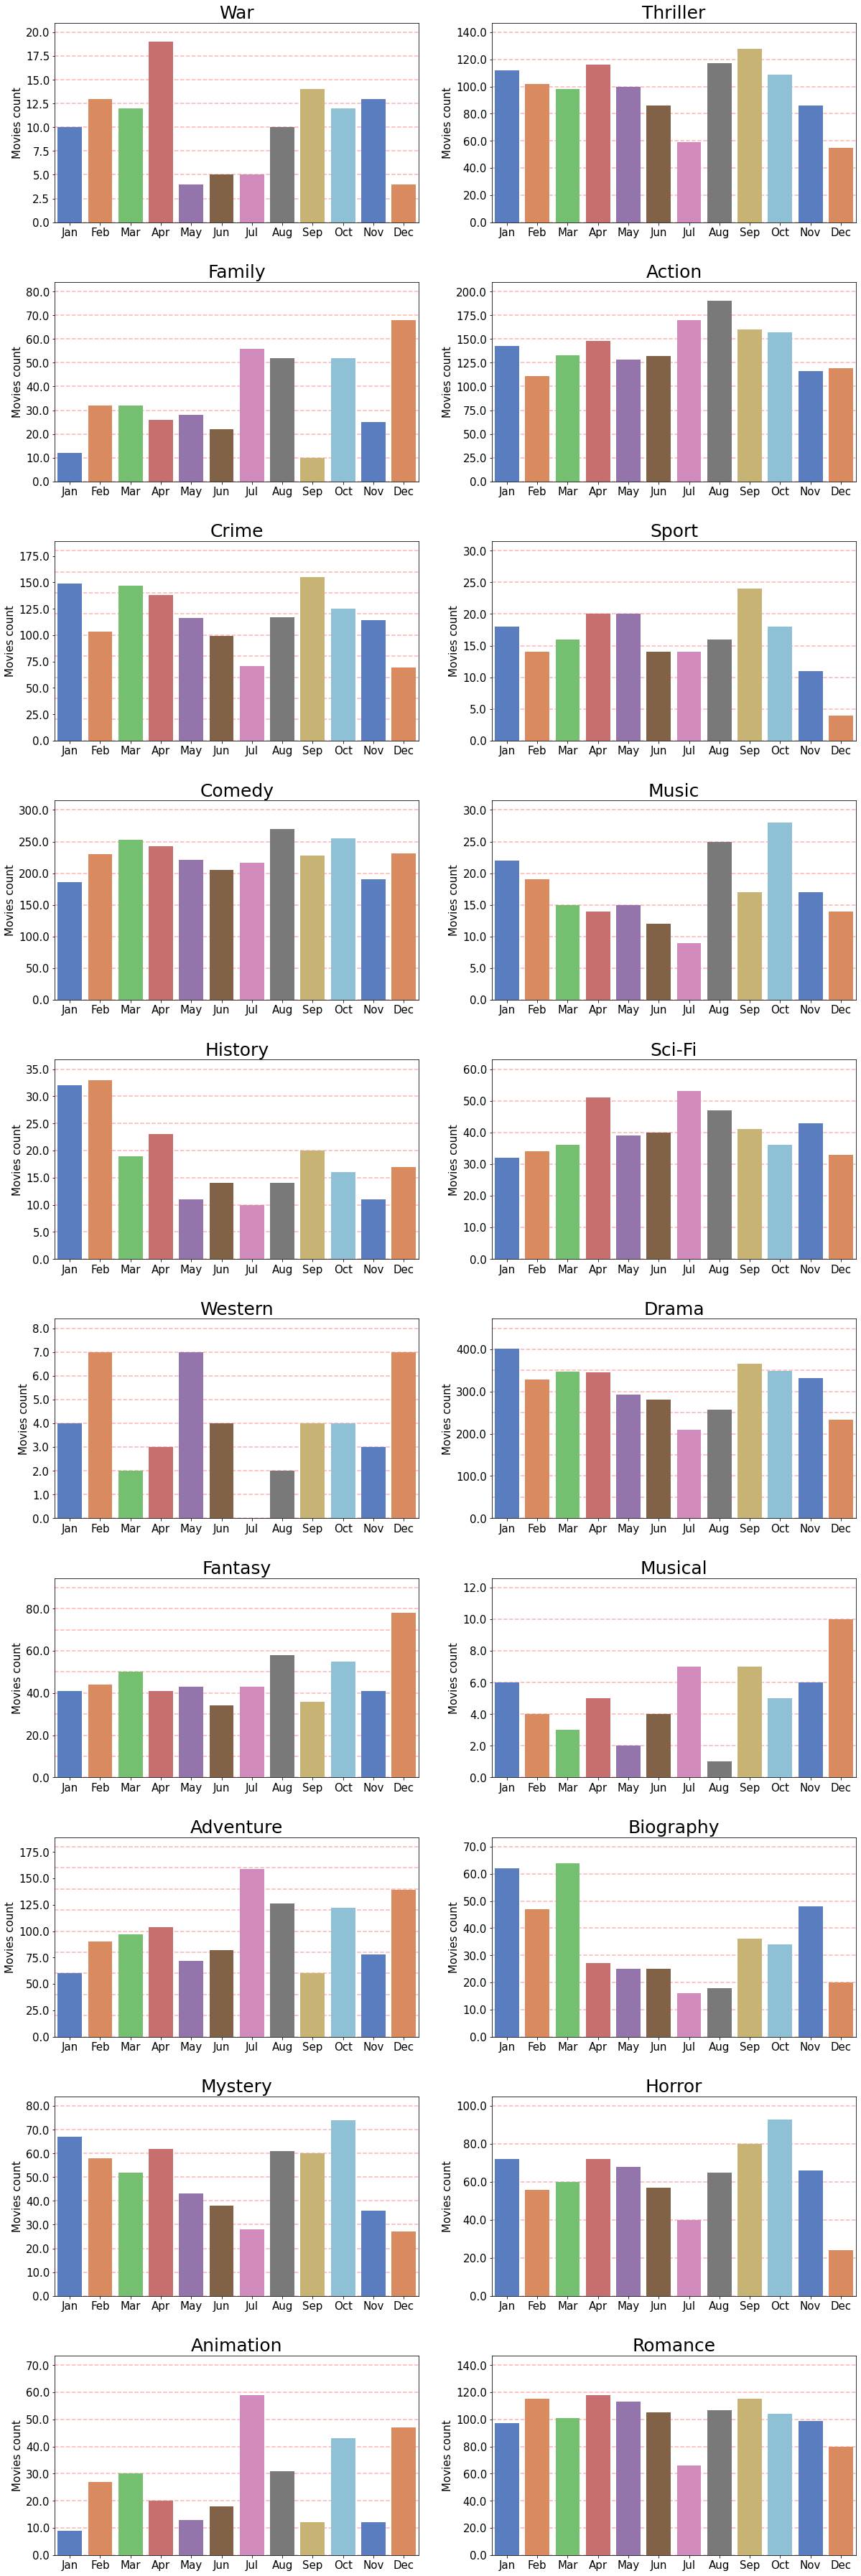

In [ ]:
# Number of movies by genre in each month
g_m_df = genre_month.copy()
g_m_df = g_m_df.set_index('genre')
plt.clf()
p_row=10
p_col=2
fig, axes = plt.subplots(nrows=p_row, ncols=p_col, figsize=(20,50))
r = 0
c = 0
# sns.set(font_scale = 2)
for i, row in g_m_df.iterrows():
    temp = pd.DataFrame(row).reset_index()  
    g=sns.barplot(x='index', y=temp.columns.values[1], data=temp, ax=axes[r,c], palette="muted",zorder=2)
    for y in g.get_yticks():
        g.axhline(y=y, ls='--', c='red', alpha=0.3,zorder=1)
    g.set_xticklabels(g.get_xmajorticklabels(),rotation=0, fontsize=15)
    g.set_yticklabels(g.get_yticks(),rotation=0, fontsize=15)
    g.set_xlabel(None)
    g.set_ylabel('Movies count',fontsize=15)
    g.set_title(i,fontsize=25)
    
    if c < p_col-1:
        c += 1
    else:
        r += 1
        c = 0
# axes[10,1].set_axis_off()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)
plt.show()

## Genre Movies vs Month

<Figure size 432x288 with 0 Axes>

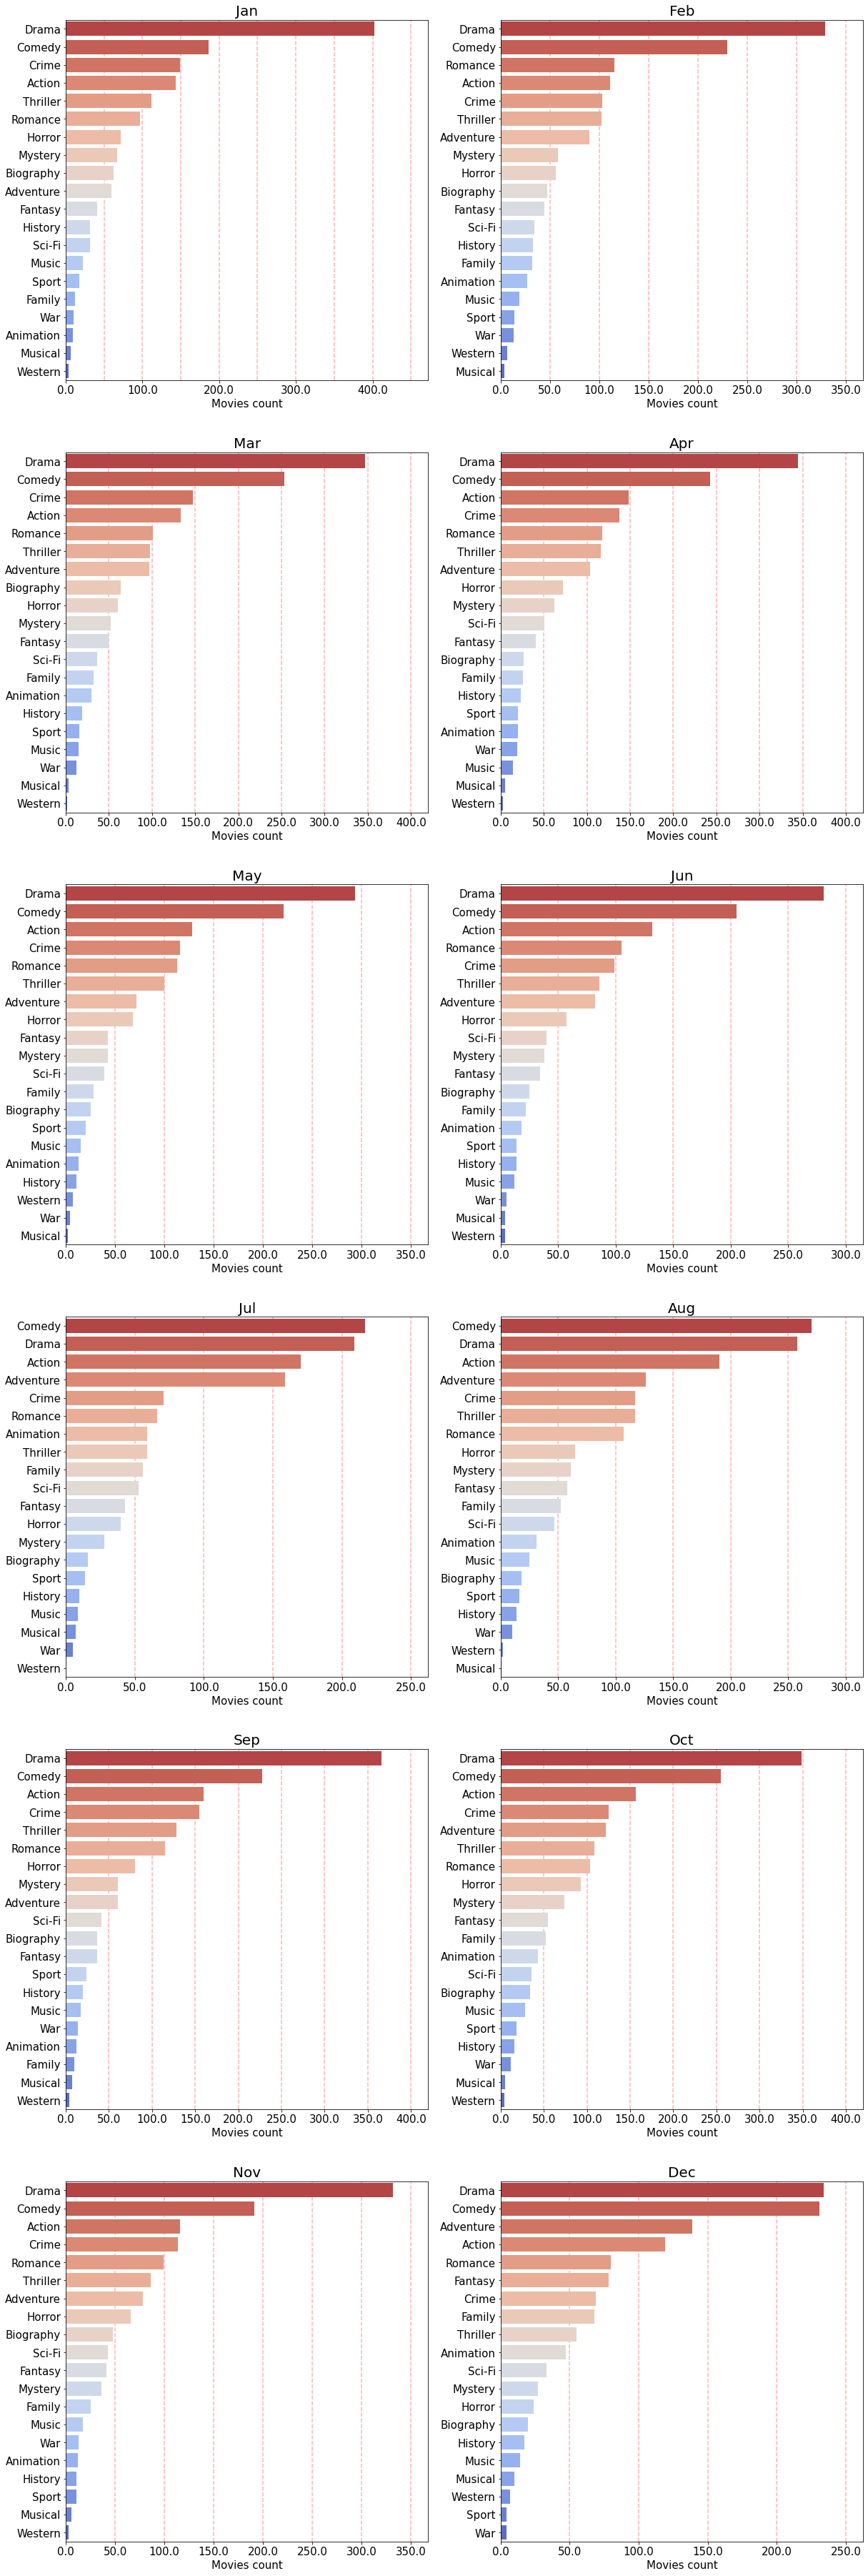

In [ ]:
# Number of movies by genre in each month
g_m_df = genre_month.copy()
g_m_df = g_m_df.set_index('genre').T
plt.clf()
p_row=6
p_col=2
fig, axes = plt.subplots(nrows=p_row, ncols=p_col, figsize=(20,50))
r = 0
c = 0
# sns.set(font_scale = 2)
for i, row in g_m_df.iterrows():
    temp = pd.DataFrame(row).reset_index() 
    g=sns.barplot(x=temp.columns.values[1], y='genre', data=temp.sort_values(temp.columns.values[1], ascending=False), ax=axes[r,c], palette="coolwarm_r", orient = 'h',zorder=2)
    for x in g.get_xticks():
        g.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)
    g.set_xticklabels(g.get_xticks(),rotation=0, fontsize=15)
    g.set_yticklabels(g.get_ymajorticklabels(),rotation=0, fontsize=15)
    g.set_xlabel('Movies count',fontsize=15)
    g.set_ylabel(None)
    g.set_title(i,fontsize=20)
    
    if c < p_col-1:
        c += 1
    else:
        r += 1
        c = 0
# axes[10,1].set_axis_off()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
plt.show()

## Genre vs duration

Text(0.5, 1.0, 'Genre Duration')

<Figure size 432x288 with 0 Axes>

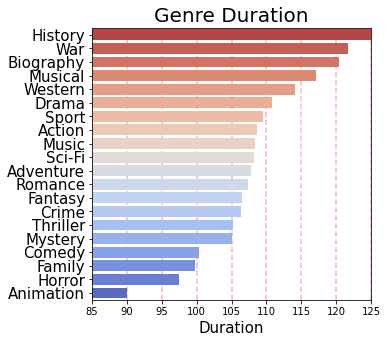

In [ ]:
plt.clf()
plt.figure(figsize=(5,5))
f = sns.barplot(x='duration', y='genre',data=genre_point_df.sort_values('duration', ascending=False), palette="coolwarm_r",zorder=2)
f.set(xlim=(85,125))
for x in f.get_xticks():
        f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
f.set_ylabel(None)
f.set_xlabel('Duration',fontsize=15)
f.set_title('Genre Duration', fontsize=20)

## Genre vs revenue

Text(0.5, 1.0, 'Genre Revenue')

<Figure size 432x288 with 0 Axes>

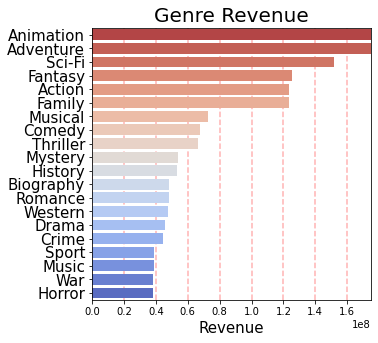

In [ ]:
plt.clf()
plt.figure(figsize=(5,5))
f = sns.barplot(x='revenue', y='genre',data=genre_point_df.sort_values('revenue', ascending=False), palette="coolwarm_r",zorder=2)
f.set(xlim=(0,1.75*1e8))
for x in f.get_xticks():
        f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
f.set_ylabel(None)
f.set_xlabel('Revenue',fontsize=15)
f.set_title('Genre Revenue', fontsize=20)

### Genre vs profit

Text(0.5, 1.0, 'Genre Profit')

<Figure size 432x288 with 0 Axes>

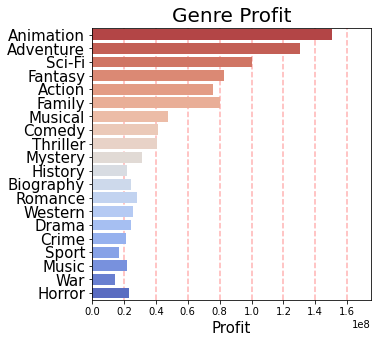

In [ ]:
plt.clf()
plt.figure(figsize=(5,5))
f = sns.barplot(x='profit', y='genre',data=genre_point_df.sort_values('revenue', ascending=False), palette="coolwarm_r",zorder=2)
f.set(xlim=(0,1.75*1e8))
for x in f.get_xticks():
        f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
f.set_ylabel(None)
f.set_xlabel('Profit',fontsize=15)
f.set_title('Genre Profit', fontsize=20)

### Genre vs Revenue vs Profit by Month

In [ ]:
genre_profit = genre_point_df[['genre','profit_by_month']].copy()
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
         'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
profit_by_month = genre_profit[['genre','profit_by_month']]['profit_by_month'].str.split(',', expand=True)
profit_by_month = profit_by_month.astype('float')
genre_profit.drop('profit_by_month', axis=1, inplace=True)
genre_profit[month] = profit_by_month
genre_profit.reset_index(drop=True, inplace=True)
genre_profit.sort_index(inplace=True)
genre_profit.fillna(0,inplace=True)

In [ ]:
genre_revenue = genre_point_df[['genre','revenue_by_month']].copy()
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
         'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
revenue_by_month = genre_revenue[['genre','revenue_by_month']]['revenue_by_month'].str.split(',', expand=True)
revenue_by_month = revenue_by_month.astype('float')
genre_revenue.drop('revenue_by_month', axis=1, inplace=True)
genre_revenue[month] = revenue_by_month
genre_revenue.reset_index(drop=True, inplace=True)
genre_revenue.sort_index(inplace=True)
genre_revenue.fillna(0,inplace=True)

<Figure size 432x288 with 0 Axes>

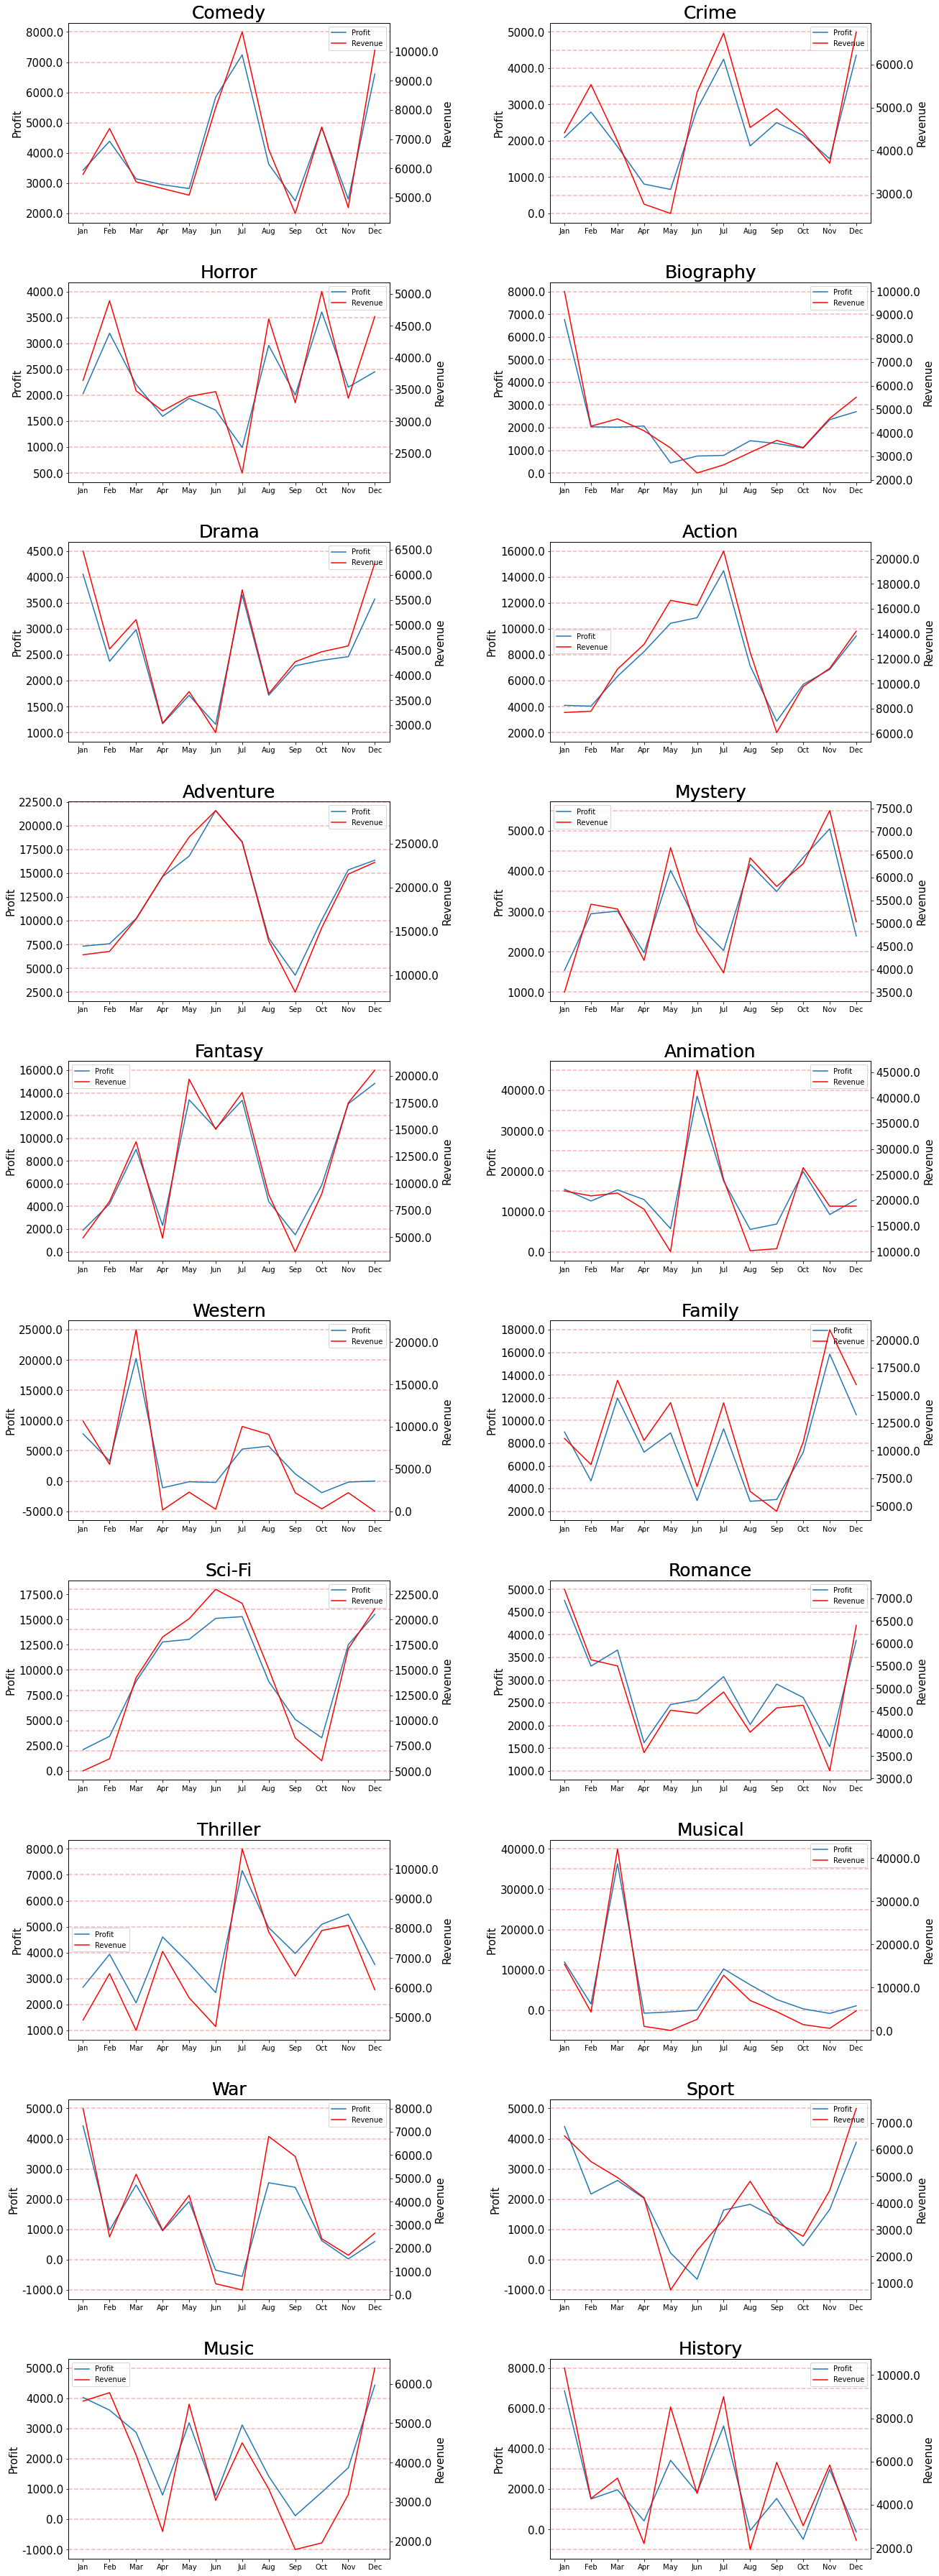

In [ ]:
# Profit
g_m_p_df = genre_profit.copy()
g_m_p_df = g_m_p_df.set_index('genre')
# Revenue
g_m_r_df = genre_revenue.copy()
g_m_r_df = g_m_r_df.set_index('genre')

plt.clf()
p_row=10
p_col=2
fig, axes = plt.subplots(nrows=p_row, ncols=p_col, figsize=(20,50))
r = 0
c = 0

for i, row in g_m_p_df.iterrows():
    temp = pd.DataFrame(row).reset_index()  
    g=sns.lineplot(x='index', y=temp.columns.values[1], data=temp, ax=axes[r,c], palette="muted",zorder=2, sort=False, label='Profit')
    for y in g.get_yticks():
        g.axhline(y=y, ls='--', c='red', alpha=0.3,zorder=1)
    # g.set_xticklabels(g.get_xmajorticklabels(),rotation=0, fontsize=15)
    g.set_yticklabels(g.get_yticks()/10000,rotation=0, fontsize=15)
    g.set_xlabel(None)
    g.set_ylabel('Profit',fontsize=15)
    g.set_title(i,fontsize=25)
    
    if c < p_col-1:
        c += 1
    else:
        r += 1
        c = 0
r = 0
c = 0
for i, row in g_m_r_df.iterrows():
    temp = pd.DataFrame(row).reset_index()  
    rev_ax = axes[r,c].twinx()
    g=sns.lineplot(x='index', y=temp.columns.values[1], data=temp, ax=rev_ax, palette="muted",zorder=2, sort=False, color='red', label='Revenue')
    # g.set_xticklabels(g.get_xmajorticklabels(),rotation=0, fontsize=15)
    g.set_yticklabels(g.get_yticks()/10000,rotation=0, fontsize=15)
    g.set_xlabel(None)
    g.set_ylabel('Revenue',fontsize=15)
    g.set_title(i,fontsize=25)
    rev_ax.get_legend().set_visible(False)

    lines_1, labels_1 = axes[r,c].get_legend_handles_labels()
    lines_2, labels_2 = rev_ax.get_legend_handles_labels()

    lines = lines_1 + lines_2

    axes[r,c].legend(lines, ['Profit', 'Revenue'], loc=0)
    
    if c < p_col-1:
        c += 1
    else:
        r += 1
        c = 0

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.5)
plt.show()

## Genre Vs vote

Text(0.5, 1.0, 'Genre Average Vote')

<Figure size 432x288 with 0 Axes>

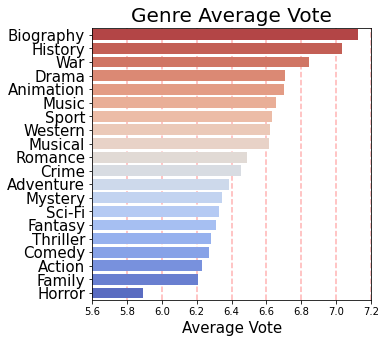

In [ ]:
plt.clf()
plt.figure(figsize=(5,5))
f = sns.barplot(x='mean_vote', y='genre',data=genre_point_df.sort_values('mean_vote', ascending=False), palette="coolwarm_r",zorder=2)
f.set(xlim=(5.6,7.2))
for x in f.get_xticks():
        f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
f.set_ylabel(None)
f.set_xlabel('Average Vote',fontsize=15)
f.set_title('Genre Average Vote', fontsize=20)

## Genre vs female

Text(0.5, 1.0, 'Genre Female Vote')

<Figure size 432x288 with 0 Axes>

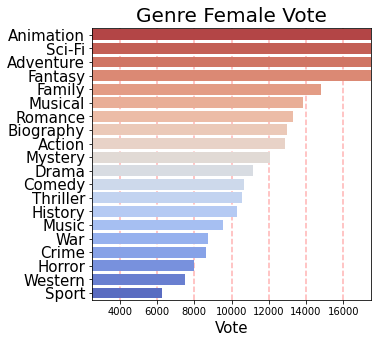

In [ ]:
plt.clf()
plt.figure(figsize=(5,5))
f = sns.barplot(x='females_allages_votes', y='genre',data=genre_point_df.sort_values('females_allages_votes', ascending=False), palette="coolwarm_r",zorder=2)
f.set(xlim=(2500,17500))
for x in f.get_xticks():
        f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
f.set_ylabel(None)
f.set_xlabel('Vote',fontsize=15)
f.set_title('Genre Female Vote', fontsize=20)

Text(0.5, 1.0, 'Genre Female Average Vote')

<Figure size 432x288 with 0 Axes>

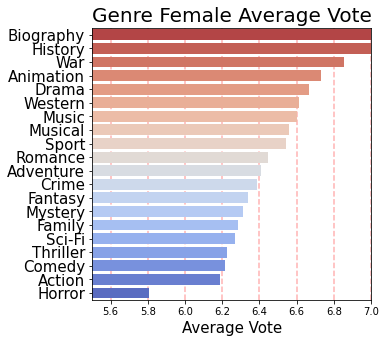

In [ ]:
plt.clf()
plt.figure(figsize=(5,5))
f = sns.barplot(x='females_allages_avg_vote', y='genre',data=genre_point_df.sort_values('females_allages_avg_vote', ascending=False), palette="coolwarm_r",zorder=2)
f.set(xlim=(5.5,7))
for x in f.get_xticks():
        f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
f.set_ylabel(None)
f.set_xlabel('Average Vote',fontsize=15)
f.set_title('Genre Female Average Vote', fontsize=20)

## Genre vs male

Text(0.5, 1.0, 'Genre Male Vote')

<Figure size 432x288 with 0 Axes>

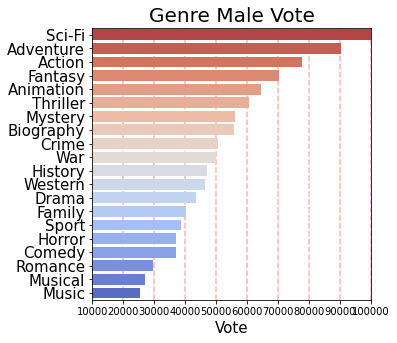

In [ ]:
plt.clf()
plt.figure(figsize=(5,5))
f = sns.barplot(x='males_allages_votes', y='genre',data=genre_point_df.sort_values('males_allages_votes', ascending=False), palette="coolwarm_r",zorder=2)
f.set(xlim=(10000,100000))
for x in f.get_xticks():
        f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
f.set_ylabel(None)
f.set_xlabel('Vote',fontsize=15)
f.set_title('Genre Male Vote', fontsize=20)

Text(0.5, 1.0, 'Genre Male Average Vote')

<Figure size 432x288 with 0 Axes>

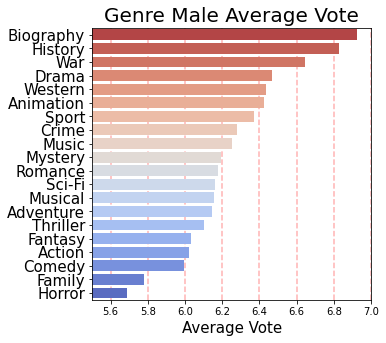

In [ ]:
plt.clf()
plt.figure(figsize=(5,5))
f = sns.barplot(x='males_allages_avg_vote', y='genre',data=genre_point_df.sort_values('males_allages_avg_vote', ascending=False), palette="coolwarm_r",zorder=2)
f.set(xlim=(5.5,7))
for x in f.get_xticks():
        f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
f.set_ylabel(None)
f.set_xlabel('Average Vote',fontsize=15)
f.set_title('Genre Male Average Vote', fontsize=20)